## Explanation of the symbols
$S$ for the number of **s**usceptible, $I$ for the number of **i**nfectious, and $R$ for the number **r**ecovered (or immune) individuals. 

Between $S$ and $I$, the transition rate is $\beta$. The average number of contacts per person times the probability of disease transmission in a contact between a susceptible and an infectious subject.

Between $I$ and $R$, the transition rate is $\gamma$. The rate of recovery or death - 'removal rate'. Here we simply assume that the birth rate(health babies) equals the death rate. i.e. the total population in an area remains.) If the duration of the infection is denoted $T_g$, then $\gamma = 1/T_g$, since an individual experiences one recovery in $T_g$ days.



Transition rates have unit of $\dfrac 1 {day}$

In [163]:
# COVID-19 SEIRS model forcasting U.S.
import math
import datetime
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from tabulate import tabulate as tb
register_matplotlib_converters()
# generation time
Tg = 21.5
# infectious period
Ti = 10
lamda = 0.25880504
# calculate R0
def R0Func():
    lamda = 0.25880504 
    R0 = 1 + lamda * Ti
    return R0
R0 = R0Func()
# gamma is removal rate
def gammaFunc(Tg = Tg):
    return 1/Tg
gamma = gammaFunc()
#beta = R0 / Ti
beta = 0.31
Ti = R0/beta
[R0,beta,Ti,beta-gamma]

[3.5880503999999998, 0.31, 11.574356129032257, 0.2634883720930232]

In [164]:

# differential equations
def SEIR(inivalue, _):
    Y = np.zeros(3)
    X = inivalue
    # dS/dt
    Y[0] = - (beta * X[0] * X[1]) / N
    # dI/dt
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    # dR/dt
    Y[2] = gamma * X[1]
    return Y
# T为传播时间
T = 200
Time = np.arange(0, T + 1)
N = 330442425
#I set the susceptible number to be 60% of the total populations. Don't know wether this is right.
I = 4
INI = (N, I, 0)
# solve the system of differential equations
RES = spi.odeint(SEIR, INI, Time)

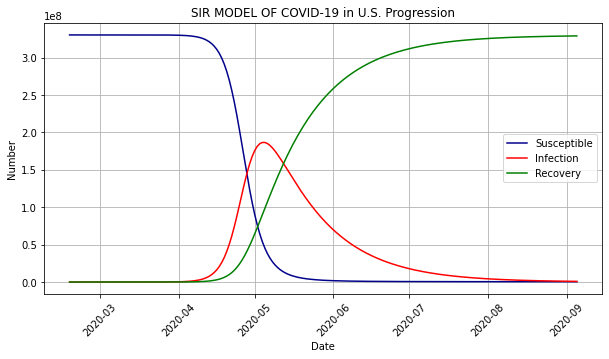

In [165]:
plt.figure(figsize=(10,5))
start_day_us = datetime.date(2020,2,18)
dates_us = [start_day_us + datetime.timedelta(n) for n in range(T + 1)]
plt.plot(dates_us, RES[:,0],color = 'darkblue',label = 'Susceptible')
plt.plot(dates_us, RES[:,1],color = 'red',label = 'Infection')
plt.plot(dates_us, RES[:,2],color = 'green',label = 'Recovery')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid()
plt.title('SIR MODEL OF COVID-19 in U.S. Progression')
plt.savefig('covid_us_SIR_1.pdf',bbox_inches='tight')
plt.show()


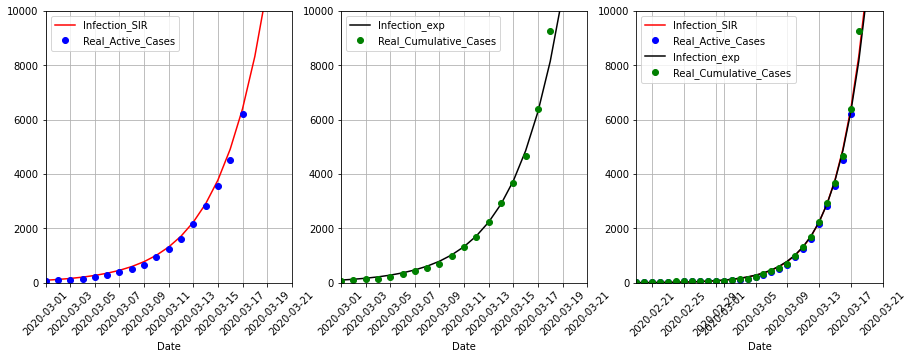

In [166]:
exp_model = np.exp(3.05313422)*np.exp(lamda*(np.arange(T+1)-6))
active_case = np.array([12,12,12,29,29,28,48,51,54,54,57,60,
              65,85,106,138,200,289,401,504,663,949,
              1248,1625,2157,2830,3553,4503,6196])
cum_case  =  np.array([15,15,15,35,35,35,53,57,59,60,63,68,
                        75,100,124,158,221,319,435,541,704,994,
                        1301,1697,2247,2943,3680,4663,6411,9259])
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(dates_us, RES[:,1],color = 'red',label = 'Infection_SIR')
plt.plot(dates_us[0:29], active_case,'bo',label = 'Real_Active_Cases')

plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylim((0, 1e4)) 
plt.xlim((datetime.date(2020,3,1),datetime.date(2020,3,21)))
plt.grid()

plt.subplot(132)
plt.plot(dates_us, exp_model,color = 'black',label = 'Infection_exp')
plt.plot(dates_us[0:30], cum_case,'go',label = 'Real_Cumulative_Cases')

plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylim((0, 1e4)) 
plt.xlim((datetime.date(2020,3,1),datetime.date(2020,3,21)))
plt.grid()

plt.subplot(133)
plt.plot(dates_us, RES[:,1],color = 'red',label = 'Infection_SIR')
plt.plot(dates_us[0:29], active_case,'bo',label = 'Real_Active_Cases')
plt.plot(dates_us, exp_model,color = 'black',label = 'Infection_exp')
plt.plot(dates_us[0:30], cum_case,'go',label = 'Real_Cumulative_Cases')

plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylim((0, 1e4)) 
plt.xlim((datetime.date(2020,2,19),datetime.date(2020,3,21)))
plt.grid()
plt.savefig('covid_us_SIR_2.pdf',bbox_inches='tight')
plt.show()

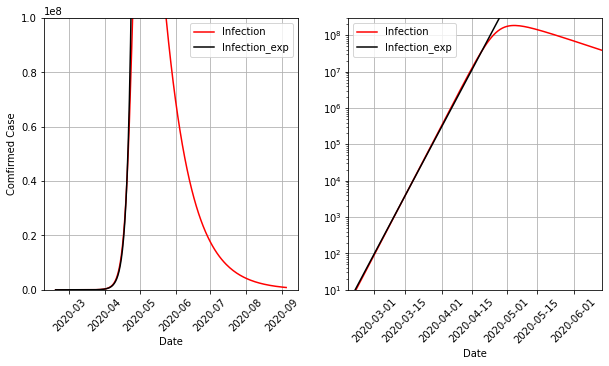

In [167]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(dates_us, RES[:,1],color = 'red',label = 'Infection')
plt.plot(dates_us, exp_model,color = 'black',label = 'Infection_exp')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Comfirmed Case')
plt.xticks(rotation=45)
plt.ylim((0, 1e8)) 
#plt.xlim((datetime.date(2020,2,18),datetime.date(2020,3,18)))
plt.grid()
plt.subplot(122)
plt.plot(dates_us, RES[:,1],color = 'red',label = 'Infection')
plt.plot(dates_us, exp_model,color = 'black',label = 'Infection_exp')
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylim((10, 3e8)) 
plt.yscale('log')
plt.xlim((datetime.date(2020,2,18),datetime.date(2020,6,14)))
plt.grid()
plt.savefig('covid_us_SIR_3.pdf',bbox_inches='tight')
plt.show()

In [170]:
Iinf = (1-gamma/beta)*N
V = Iinf/4.5 - 1
SIS = Iinf/(1+V*np.exp(-(lamda)*np.arange(T+1)))
tp = np.zeros((T+1,6))
tp[:,2] = np.rint(RES[:,1])
tp[:,4] = np.rint(exp_model)
tp[:,5] = np.rint(SIS)
tp = tp.tolist()
for i in range(T+1):
    tp[i][0] = datetime.date(2020,2,18)+datetime.timedelta(days = i)
    if i < active_case.size:
        tp[i][1] = active_case[i]
        tp[i][3] = cum_case[i]
print(tb(tp, headers=['date', 'active case','SIR','cumulative case','Exponetial','SIS'],tablefmt='orgtbl'))


| date       |   active case |              SIR |   cumulative case |       Exponetial |              SIS |
|------------+---------------+------------------+-------------------+------------------+------------------|
| 2020-02-18 |            12 |      4           |                15 |      4           |      4           |
| 2020-02-19 |            12 |      5           |                15 |      6           |      6           |
| 2020-02-20 |            12 |      7           |                15 |      8           |      8           |
| 2020-02-21 |            29 |      9           |                35 |     10           |     10           |
| 2020-02-22 |            29 |     11           |                35 |     13           |     13           |
| 2020-02-23 |            28 |     15           |                35 |     16           |     16           |
| 2020-02-24 |            48 |     19           |                53 |     21           |     21           |
| 2020-02-25 |            51

In [172]:
np.savetxt("SIR.csv", tp, delimiter=",", fmt='%s', header='Date,Active,SIR,Cumulative,Exp,SIS')